# Define the problem

**Process Management Problem**

In the process management problem, we are given a set of tasks represented by processes $p$. Each process $p_i$ has an associated value $v_i$​ (indicating its importance) and a duration $d_i$​ (representing the time required to execute the task). Additionally, there exists a maximum allowed duration $d_{max}$​ within which we must execute these tasks.


Our objective is to select a subset $S$ of processes from $p$ such that their total duration does not exceed $d_{max}$​, while maximizing the overall value of the executed processes. In other words, we aim to find the set S that maximizes the expression:

$$\sum_{i\in S} v_i$$

subject to the constraint:

$$\sum_{i\in S} d_i \leq d_{max}$$

## Define problem instance

In [8]:
import random 


random.seed(13)

# Define the number of items
n_items = 6

# Define ranges
duration_range = [1, 7]
values_range = [5, 15]
max_duration_percentage = 0.7

# Fill the weights and values 
duration = [random.randint(duration_range[0], duration_range[1]) for _ in range(n_items)]
values  = [random.randint(values_range[0], values_range[1]) for _ in range(n_items)]

# Compute the maximum allowed weight
max_duration = int(max_duration_percentage * sum(duration))


# Print the instance
print("-" * 20)
print("Instance Details:")
print("-" * 20)
print(f"Duration                 : {duration}")
print(f"Values                   : {values}")
print(f"Total duration           : {sum(duration)}")
print(f"Maximum allowed duration : {max_duration}")

--------------------
Instance Details:
--------------------
Duration                 : [3, 3, 6, 6, 7, 7]
Values                   : [7, 15, 8, 15, 7, 8]
Total duration           : 32
Maximum allowed duration : 22


Reference Solution (Selected Processes are **Bolded**):

Duration: [3, **3**, **6**, **6**, 7, **7**]

Values: [7, **15**, **8**, **15**, 7, **8**]

Total selected Duration: 22

Total selected values: 46

# Hackathon Tasks 


## Problem 1

### Build the cost hamiltonians for the Process Management problem:

In [10]:
from qibo.symbols import Z, X
from qibo.hamiltonians import SymbolicHamiltonian

def build_cost_hamiltonian(values: list[int], duration: list[int], max_duration: int) -> SymbolicHamiltonian:
    """This function should be filled to build the problem cost hamiltonian.

    Args:
        values (list[int]): the list of values.
        duration (list[int]): the list of durations. 
        max_duration (int): the maximum value of the allowed duration.
        
    """
    cost_hamiltonian = 0
    
    L = len(values)
    d_max = max_duration
    
    ps = list(map(int,bin(d_max)[2:]))
    P = len(ps)
    
    b = sum((2**j) * (1 - Z(L + j)) / 2 for j in range(P))

    term_1 = sum(values[i] * (1 - Z(i)) / 2 for i in range(L))
    
    a = sum(duration[i] * (1 - Z(i)) / 2 for i in range(L))
    
    term_2 = (a - d_max + b) ** 2
    
    cost_hamiltonian = -term_1 + 1 * term_2
        
    return SymbolicHamiltonian(cost_hamiltonian)

### Compute the number fo qubits required to execute the cost hamiltonian

In [11]:
# define the number of qubits:

nqubits=11

### Diagonalize the cost hamiltonian and examen its eigenvalues and eigenvectors. 
- Show that the ground state eigenvector does actually correspond to the ground state energy of the problem. (Note: the ground state could be degenerate)

In [12]:
import numpy as np
from qibo import set_backend

# set the backend used for the calculation 
set_backend("numpy", platform=None)


# create the cost Hamiltonian for the given graph
cost_hamiltonian = build_cost_hamiltonian(values=values, duration=duration, max_duration=max_duration)

ham_matrix = cost_hamiltonian.matrix

eig_val, eig_vec = np.linalg.eig(ham_matrix)
eig_vec = ["{0:0{bits}b}".format(i.argmax(), bits=nqubits) for i in eig_vec]

vec = zip(eig_val, eig_vec)
diagonalized_solution = sorted(vec, key=lambda x: x[0])

print()
print(diagonalized_solution)

[Qibo 0.1.11|INFO|2024-05-05 09:13:50]: Using numpy backend on /CPU:0
[Qibo 0.1.11|WARNING|2024-05-05 09:13:50]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.



[((-46+0j), '01110100000'), ((-45+0j), '01110110000'), ((-45+0j), '01111000000'), ((-45+0j), '11010111000'), ((-45+0j), '11110000100'), ((-44+0j), '01011100000'), ((-44+0j), '01111010000'), ((-44+0j), '11010100100'), ((-44+0j), '11010101000'), ((-44+0j), '11011011000'), ((-44+0j), '11110010100'), ((-44+0j), '11110011000'), ((-44+0j), '11110100000'), ((-43+0j), '11011000100'), ((-43+0j), '11011001000'), ((-43+0j), '11111000000'), ((-42+0j), '01110101000'), ((-41+0j), '01011110000'), ((-41+0j), '01111001000'), ((-41+0j), '11010110000'), ((-41+0j), '11010110100'), ((-41+0j), '11110001000'), ((-41+0j), '11110001100'), ((-40+0j), '11011010000'), ((-40+0j), '11011010100'), ((-38+0j), '01010101100'), ((-38+0j), '01110011100'), ((-38+0j), '10110100000'), ((-38+0j), '11100111000'), ((-37+0j), '01010110100'), ((-37+0j), '01010111100'), ((-37+0j), '01011001100'), ((-37+0j), '01101100000'), ((-37+0j), '01110000010'), ((-37+0j), '01110001100'), ((-37+0j), '01110111000'), ((-37+0j), '10110110000'),

## Problem 2

### Given that we only have **6 qubits** to solve this problem. Reduce the hamiltonian to use **only 6 qubits**.

In [13]:
nqubits = 6

### Solve this hamiltonian using the QAOA algorithm. 

        step 1. Define the Mixing hamiltonian.

In [14]:
def build_mixer_hamiltonian(nqubits: int) -> SymbolicHamiltonian:
    '''
    build the mixer hamiltonian for the given graph.

    args:
        graph: graph
            A network graph

    returns:
        The mixer hamiltonian of the given graph

    '''
    mixing_hamiltonian = sum(X(i) for i in range(nqubits))
    
    return SymbolicHamiltonian(mixing_hamiltonian)

In [15]:
from qibo.symbols import Z, X
from qibo.hamiltonians import SymbolicHamiltonian

def build_cost_hamiltonian(values: list[int], duration: list[int], max_duration: int) -> SymbolicHamiltonian:
    """This function should be filled to build the problem cost hamiltonian.

    Args:
        values (list[int]): the list of values.
        duration (list[int]): the list of durations. 
        max_duration (int): the maximum value of the allowed duration.
        
    """
    cost_hamiltonian = 0
    
    L = len(values)
    d_max = max_duration
    
    term_1 = sum(values[i] * (1 - Z(i)) / 2 for i in range(L))
    
    a = sum(duration[i] * (1 - Z(i)) / 2 for i in range(L))
    
    term_2 = (a - d_max) ** 2
    
    cost_hamiltonian = -term_1 + 1 * term_2
        
    return SymbolicHamiltonian(cost_hamiltonian)

        Step 2. Run the QAOA algorithm.

In [16]:
from qibo import models

hamiltonian = build_cost_hamiltonian(values=values, duration=duration, max_duration=max_duration)
mixer_hamiltonian = build_mixer_hamiltonian(nqubits)

# create QAOA model given the Hamiltonians
qaoa = models.QAOA(hamiltonian=hamiltonian, mixer=mixer_hamiltonian)

# optimize using random initial variational parameters with four layers 
n_layers = 5
# initial_parameters = 0.01 * np.random.random(n_layers * 2)
initial_parameters =  0.01 *  (2 * np.random.random(n_layers * 2) - 1) * np.pi
print(initial_parameters)

# run the QAOA optimization with the initial parameters and the hamiltonians defined 

# Define random initial variational parameters with four layers 
n_layers = 4
initial_parameters = 0.01 * np.random.random(n_layers * 2)


"""
supported optimization Method: 
- Nelder-Mead 
- parallel_L-BFGS-B
- Powell
- CG
- cma
- sgd
- L-BFGS-B
- Newton-CG
- COBYLA
- BFGS
- trust-constr
"""
method = "Powell"


best_energy, final_parameters, _ = qaoa.minimize(initial_parameters, method=method)

print("best energy: ", best_energy)

[-0.00874906  0.01730236 -0.03117106  0.02011708 -0.01142464  0.00566839
  0.00779666 -0.01762492 -0.01916839 -0.00242541]
best energy:  -6.293152757621163


    Step 3. Display solution and compare it to the ground state you obtained in problem 1

In [17]:
qaoa.set_parameters(final_parameters)
quantum_state = qaoa.execute(None)

probabilities = (np.abs(quantum_state) ** 2)
probabilities = zip(probabilities, [i for i in range(len(probabilities))])
probabilities = sorted(probabilities, key=lambda x: x[0], reverse=True)
probabilities = [("{:.2f} %".format(round(p*100, 4)), "{0:0{bits}b}".format(s, bits=nqubits)) for p, s in probabilities]
print(probabilities)
qaoa_solution = probabilities[0][1]
print("-"*10)

print("The best solution is:", qaoa_solution )

[('7.84 %', '101110'), ('7.30 %', '101011'), ('7.21 %', '011101'), ('5.88 %', '100111'), ('5.56 %', '111101'), ('5.24 %', '010011'), ('4.35 %', '111010'), ('3.96 %', '011010'), ('3.53 %', '101101'), ('3.22 %', '000111'), ('3.00 %', '111111'), ('2.77 %', '101010'), ('2.76 %', '001011'), ('2.65 %', '111001'), ('2.26 %', '111110'), ('2.16 %', '011100'), ('1.62 %', '010101'), ('1.61 %', '110110'), ('1.57 %', '010111'), ('1.53 %', '111100'), ('1.52 %', '110111'), ('1.41 %', '010001'), ('1.23 %', '110101'), ('1.21 %', '101001'), ('1.11 %', '110010'), ('1.11 %', '100011'), ('1.10 %', '100101'), ('1.08 %', '101111'), ('1.02 %', '111000'), ('1.00 %', '011001'), ('0.98 %', '110100'), ('0.97 %', '111011'), ('0.87 %', '100001'), ('0.81 %', '000011'), ('0.77 %', '011110'), ('0.76 %', '010100'), ('0.73 %', '011111'), ('0.71 %', '010010'), ('0.70 %', '001000'), ('0.68 %', '010110'), ('0.52 %', '110001'), ('0.43 %', '001100'), ('0.37 %', '011000'), ('0.32 %', '000010'), ('0.32 %', '110011'), ('0.32 %'

### Solve this hamiltonian using Quantum Adiabatic Evolution

        Setp 1. Define initial hamiltonian

In [18]:
def build_initial_hamiltonian(nqubits: int) -> SymbolicHamiltonian:
    '''
    build the mixer hamiltonian for the given graph.

    args:
        graph: graph
            A network graph

    returns:
        The mixer hamiltonian of the given graph

    '''
    mixing_hamiltonian = mixing_hamiltonian = sum(X(i) for i in range(nqubits)) 
    
    return SymbolicHamiltonian(mixing_hamiltonian)

    Step 2. Run the Adiabatic Evolution

In [19]:
import numpy as np
from qibo.models.evolution import AdiabaticEvolution
from qibo.hamiltonians.hamiltonians import Hamiltonian


# build initial (H0) and target (H1) hamiltonians
H0 = build_initial_hamiltonian(nqubits=nqubits)
H1 = build_cost_hamiltonian(values=values, duration=duration, max_duration=max_duration)

# calculate the dense hamiltonian from the symbolic hamiltonian
H1_dense = Hamiltonian(nqubits, H1.calculate_dense().matrix)
H0_dense = Hamiltonian(nqubits, H0.calculate_dense().matrix)

# Define the time steps
dt = 0.1

# Define the final evolution time
T = 20

# define the schedule. This is a function of time that defines the scheduling of the adiabatic evolution. 
# Can be either a function of time s(t) or a function with two arguments s(t, p) 
# where p corresponds to a vector of parameters to be optimized.
def s(t): return t

# construct the adiabatic model
adiabatic_model = AdiabaticEvolution(H0_dense, H1_dense, s, dt)

# execute the adiabatic optimization
adiabatic_quantum_state = adiabatic_model.execute(final_time=T)

    Step 3. Display solution and compare it to the ground state you obtained in problem 1 and using QAOA

In [20]:
# obtain the state with the highest probability
solution_dec  = (np.abs(adiabatic_quantum_state) ** 2).argmax()
adiabatic_solution = "{0:0{bits}b}".format(solution_dec, bits=nqubits)


print("the solution is: ", adiabatic_solution)

the solution is:  011101


### What are the downsides to the method you used to reduce the number of qubits? 

We are cutting off many of the other viable solutions which might contain higher final values. We are considering that only states with the max duration can have the highest values, since it is more likely that they can select a bunch of processes which have a high sum of their values. Nevertheless, we are descriminating many solutions without any rigorous proof.

## Problem 3

### Given this new dataset generate a hamiltonian that only uses 3 qubits 

In [21]:
import random 


random.seed(13)

# Define the number of items
n_items = 3

# Define ranges
max_duration_percentage = 0.7

# Fill the weights and values 
values   = [6, 2, 6]
duration = [3, 3, 6]

# Compute the maximum allowed weight
max_duration = int(max_duration_percentage * sum(duration))



# Print the instance
print("-" * 20)
print("Instance Details:")
print("-" * 20)
print(f"Duration                 : {duration}")
print(f"Values                   : {values}")
print(f"Total duration           : {sum(duration)}")
print(f"Maximum allowed duration : {max_duration}")

--------------------
Instance Details:
--------------------
Duration                 : [3, 3, 6]
Values                   : [6, 2, 6]
Total duration           : 12
Maximum allowed duration : 8


### Design a circuit layout that is suitable for this Hamiltonian

    Step 1. Create each element of the circuit

Your qubits will have a critical current of 230nA, shunting capacitance of 50fF, Z loop capacitance of 4.4fF, inductance of 480pH, x to z loop current ration of 0.4 and junction assymetry of 0.

The coupler's parameters are given

In [22]:
import sys
sys.path.append('/Users/denizadiguzel/CAS')

In [23]:
import cas as cas

# coupler parameters
i_sigma = 565
c_sigma = 11
lc = 580
d = 0.0

# qubit params
i_c = 230;
c_shunt = 50; 
c_z = 4.4; 
lq = 480; 
alpha = 0.4; d = 0.0

# define couplers and qubits

q0 = cas.CSFQ(i_c, c_shunt, c_z, lq, alpha, d)
q1 = cas.CSFQ(i_c, c_shunt, c_z, lq, alpha, d)
q2 = cas.CSFQ(i_c, c_shunt, c_z, lq, alpha, d)

c01 = cas.Coupler(i_sigma, c_sigma, lc, d)
c12 = cas.Coupler(i_sigma, c_sigma, lc, d)
c20 = cas.Coupler(i_sigma, c_sigma, lc, d)

circuit_elements = [q0, c01, q1, c12, q2, c20]

/Users/denizadiguzel/opt/anaconda3/envs/hardwareETH/lib/python3.12/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:603: SparseEfficiencyWarning: splu converted its input to CSC format
  return splu(A).solve


    Step 2. Define the qubit-coupler interaction and create the circuit object

A good approximation is to consider only the first 5 energy levels of the qubit and the first 2 energy levels of the coupler

In [24]:
m = 65; m_mat = np.zeros((6, 6)) # mutual inductance matrix (given)

m_mat[0, 1] = -m; m_mat[1, 2] = m
m_mat[2, 3] = -m; m_mat[3, 4] = m
m_mat[4, 5] = -m; m_mat[5, 0] = m

m_mat = -(m_mat + m_mat.T)

trunc_vec = np.array([5, 2, 5, 2, 5, 2]) # truncation vector for the energies of each element
circuit = cas.AnnealingCircuit(circuit_elements, m_mat, trunc_vec)

### Design an annealing Ising schedule 

    Step 1. Define the starting (initial) and objective hamiltonian coefficients

In [26]:
# initialization hamiltonian
h0 = ... # type: dict[str, np.ndarray]
h0 = {};
twopi = 2*np.pi
h0["x_0_start"] = 1 
h0["x_1_start"] = 1
h0["x_2_start"] = 1

h0["z_0_start"] = 0
h0["z_1_start"] = 0
h0["z_2_start"] = 0

h0["zz_01_start"] = 0
h0["zz_12_start"] = 0
h0["zz_20_start"] = 0

# objective hamiltonian
hf = ... # type: dict[str, np.ndarray]
hf = {};
hf["x_0_end"] = 0
hf["x_1_end"] = 0
hf["x_2_end"] = 0

d_max = max_duration
max_z = max(values) + 2 * d_max * max(duration)
max_zz = max(duration)**2

hf["z_0_end"] = (values[0] + 2 * d_max * duration[0]) / max_z
hf["z_1_end"] = (values[1] + 2 * d_max * duration[1]) / max_z
hf["z_2_end"] = (values[2] + 2 * d_max * duration[2]) / max_z

hf["zz_01_end"] = duration[0] * duration[1] / max_zz
hf["zz_12_end"] = duration[1] * duration[2] / max_zz
hf["zz_20_end"] = duration[0] * duration[2] / max_zz

    Step 2. Create a method to get a an arbitrary schedule for the circuit designed above

In [27]:
def get_schedule(h0: dict[str, np.ndarray], hf: dict[str, np.ndarray], points: int, schedule: callable) -> dict[str, int | np.ndarray]:
    """Given the ising coefficients for the initial and final hamiltonian of the annealing scheduel,
    and given some time dependance of the schedule (eg. linear, exponential, etc), returns the ising
    coefficients for x and z at each time step.

    args:
        h0 (dict[str, np.ndarray]): ising coefficients of the starting hamiltonian h0
        hf (dict[str, np.ndarray]): ising coefficients of the target (final) hamiltonian hf
        points (int): number of points in the annealing schedule
        schedule (callable): time dependance of the schedule
    
    returns:
        dict[str, np.ndarray]: Dictionary of ising coefficients at each step of the schedule
    """

    ising_dict = {}; 
    ising_dict["points"] = points

    ising_dict["x_0"] = schedule(h0["x_0_start"],hf["x_0_end"], points )
    ising_dict["x_1"] = schedule(h0["x_1_start"],hf["x_1_end"], points )
    ising_dict["x_2"] = schedule(h0["x_2_start"],hf["x_2_end"], points )

    ising_dict["z_0"] = schedule(h0["z_0_start"],hf["z_0_end"], points )
    ising_dict["z_1"] = schedule(h0["z_1_start"],hf["z_1_end"], points )
    ising_dict["z_2"] = schedule(h0["z_2_start"],hf["z_2_end"], points )

    ising_dict["zz_0,1"] = schedule(h0["zz_01_start"],hf["zz_01_end"], points )
    ising_dict["zz_1,2"] = schedule(h0["zz_12_start"],hf["zz_12_end"], points )
    ising_dict["zz_0,2"] = schedule(h0["zz_20_start"],hf["zz_20_end"], points )
    
    
    return ising_dict



    Step 2. Get the ising coefficients for a linear and an exponential schedule for a resolution of 1ns

In [28]:
def linear_schedule(start, end, points):
    y = np.linspace(start, end, points)
    return y

def exp_schedule(start, end, points):
    epsilon = 1e-8
    y = np.exp(np.linspace(np.log(start+epsilon), np.log(end+epsilon), points))
    return y 

ising_linear = get_schedule(h0, hf, points=10, schedule=linear_schedule)
ising_exp = get_schedule(h0, hf, points=10, schedule=exp_schedule)


    Step 3. Calculate the flux schedule for the exponential schedule

In [29]:
def get_fluxes(ising_schedule: dict[str, int | np.ndarray], optimizer: str) ->  dict[str, int | np.ndarray]:
    """Get the flux schedule from a given ising schedule.

    Args:
        ising_schedule (dict[str, int  |  np.ndarray]): dictionary with the number of points in the schedule
            and the ising coefficients for each control of the circuit at each point of the schedule
        optimizer (str): name of the lmfit minimizer to use

    Returns:
        dict[str, int | np.ndarray]: dictionary containing the number of points in the schedule and the fluxes
            to be applied at each control of the circuit at each point of the schedule.
    """
    flux_dict = circuit.get_custom_fluxes_pwsw(ising_schedule, verbose=True, optimizer_method=optimizer)
    return flux_dict
    

### With the obtain fluxes calculate the energy spectrum of the circuit

    Step 1. Define a function to get the spectrum from the flux schedule using the code from CAS

In [30]:
def get_schedule_spectrum(flux_dict: dict[str, int | np.ndarray], levels: int) -> np.ndarray:
    """Calculate the energy spectrum through the schedule. The more levels we try to calculate,
    the more computationally expensive this will be.

    Args:
        flux_dict (dict[str, int  |  np.ndarray]): dictionary containing the number of points in the schedule and the fluxes
            to be applied at each control of the circuit at each point of the schedule.
        levels (int): energy levels to compute

    Returns:
        np.ndarray: of size (schedule points, levels) with the energy gaps for each level (En - E0),
            where E0 is the ground state energy and En is the energy of level n.
    """
    energies = circuit.calculate_spectrum(flux_dict, levels= levels)
    return energies

In [85]:
import matplotlib.pyplot as plt

def flux_plotter(fluxes, points):
    custom_flux_dict_pwsw = fluxes
    s = np.linspace(0, 1, points)
    plt.clf();
    fig = plt.figure(num=1);
    fig.set_size_inches((10, 7))

    ax1 = plt.subplot(2, 2, 1)
    for i, qubit_index in enumerate(circuit.qubit_indices):
        

        plt.plot(s, custom_flux_dict_pwsw["phix_"+str(qubit_index)]/2/np.pi, '--', color="C{0:d}".format(i), lw=2.5, label=r"qubit$_{0:d}$".format(i),)
        
        plt.xlabel(r"$s=t/t_a$"); plt.ylabel(r"$\varphi_x/2\pi$")
        plt.legend()

    ax2 = plt.subplot(2, 2, 2)
    for i, qubit_index in enumerate(circuit.qubit_indices):
        
        plt.plot(s, custom_flux_dict_pwsw["phiz_"+str(qubit_index)]/2/np.pi, '--', color="C{0:d}".format(i), lw=2.5, label=r"qubit$_{0:d}$".format(i))
        
        plt.xlabel(r"$s=t/t_a$"); plt.ylabel(r"$\varphi_z/2\pi$")
        plt.legend()
        
    ax3 = plt.subplot(2, 2, 3)

    for i, coupler_index in enumerate(circuit.coupler_indices):
        
        plt.plot(s, custom_flux_dict_pwsw["phix_"+str(coupler_index)]/2/np.pi, '--', color="C{0:d}".format(i), lw=2.5, label=r"coupler$_{0:d}$".format(i))
        
        plt.xlabel(r"$s=t/t_a$"); plt.ylabel(r"$\varphi_x/2\pi$")
        plt.legend()
        
    ax4 = plt.subplot(2, 2, 4)
    for i, coupler_index in enumerate(circuit.coupler_indices):
        plt.plot(s, custom_flux_dict_pwsw["phiz_"+str(coupler_index)]/2/np.pi, '--', color="C{0:d}".format(i), lw=2.5, label=r"coupler$_{0:d}$".format(i))
        
        plt.xlabel(r"$s=t/t_a$"); plt.ylabel(r"$\varphi_z/2\pi$")
        plt.legend()
        
        
    plt.tight_layout()
    plt.show()

In [32]:
ising_linear = get_schedule(h0, hf, points=10, schedule=linear_schedule)

fluxes = get_fluxes(ising_linear,"leastsq" )

calculating qubit biases for qubit 1 of 3
point #9 single qubit residuals: 
 [-9.17699673e-02  4.96251627e-06] 

calculating qubit biases for qubit 2 of 3


/Users/denizadiguzel/CAS/cas/elements.py:617: UserWarning: For the point #9, solver found solutions that are not optimal. The relative error is 17.33 % for single qubit residuals
  warnings.warn(


point #9 single qubit residuals: 
 [-9.17677756e-02  5.36862642e-06] 

calculating qubit biases for qubit 3 of 3


/Users/denizadiguzel/CAS/cas/elements.py:617: UserWarning: For the point #9, solver found solutions that are not optimal. The relative error is 18.72 % for single qubit residuals
  warnings.warn(


point #9 single qubit residuals: 
 [-9.18094023e-02  9.98056680e-06] 


 calculating coupler bias for coupler 1 of 3


/Users/denizadiguzel/CAS/cas/elements.py:617: UserWarning: For the point #9, solver found solutions that are not optimal. The relative error is 9.18 % for single qubit residuals
  warnings.warn(


schedule point 10 / 10
 calculating coupler bias for coupler 2 of 3
schedule point 10 / 10
 calculating coupler bias for coupler 3 of 3


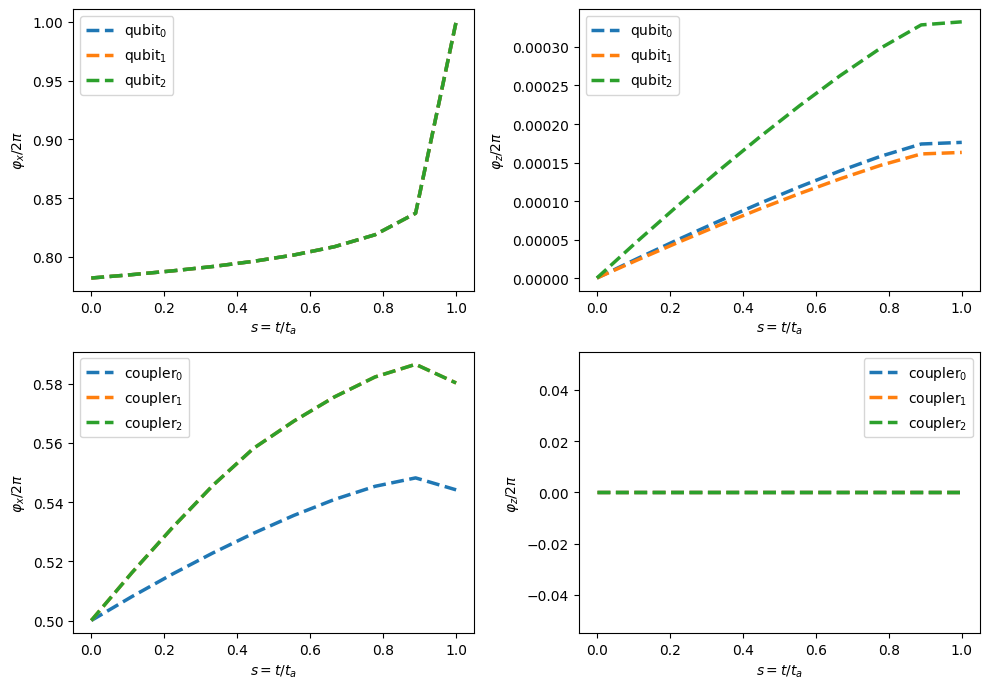

In [86]:

flux_plotter(fluxes, points = 10)

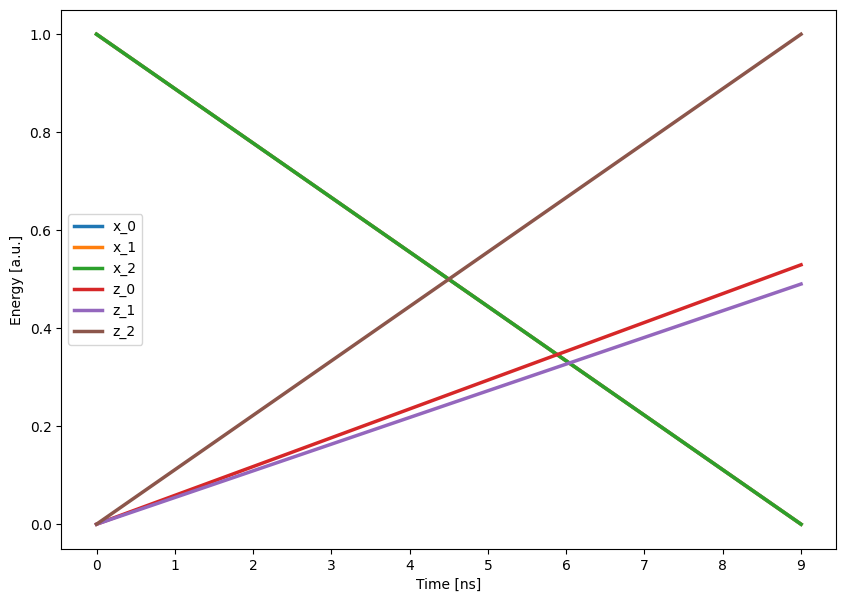

In [97]:
def scheduler_plotter(ising_dict, points):
    x_0 = ising_dict["x_0"] 
    x_1 = ising_dict["x_1"]
    x_2 = ising_dict["x_2"] 

    z_0 = ising_dict["z_0"] 
    z_1 = ising_dict["z_1"]
    z_2 =  ising_dict["z_2"]

    zz_01 = ising_dict["zz_0,1"]
    zz_12 = ising_dict["zz_1,2"] 
    zz_02 = ising_dict["zz_0,2"] 


    plt.clf();
    fig = plt.figure(num=1);
    fig.set_size_inches((10, 7))

    time_arr = np.linspace(0, points, num=points, endpoint=False) 

    ax1 = plt.subplot(1, 1, 1)
        
    plt.plot(time_arr,  x_0, lw=2.5, label="x_0")
    plt.plot(time_arr,  x_1, lw=2.5, label="x_1")
    plt.plot(time_arr,  x_2, lw=2.5, label="x_2")

    plt.plot(time_arr,  z_0, lw=2.5, label="z_0")
    plt.plot(time_arr,  z_1, lw=2.5, label="z_1")
    plt.plot(time_arr,  z_2, lw=2.5, label="z_2")
    
    plt.xlabel("Time [ns]"); plt.ylabel("Energy [a.u.]")
    plt.xticks(np.arange(0, points , step=1))
    plt.legend()


scheduler_plotter(get_schedule(h0, hf, points=10, schedule=linear_schedule), points =10)

In [46]:
energies = get_schedule_spectrum(fluxes, 4)

In [47]:
energies


array([[0.        , 1.91784738, 1.93232238, 1.93232238],
       [0.        , 1.67021172, 1.69684211, 1.78331611],
       [0.        , 1.42557285, 1.4681412 , 1.66447827],
       [0.        , 1.19892387, 1.24215236, 1.54816493],
       [0.        , 0.99379403, 1.01384455, 1.41156824],
       [0.        , 0.77791655, 0.82033348, 1.23703898],
       [0.        , 0.53973901, 0.66034262, 1.02949991],
       [0.        , 0.30699251, 0.51416995, 0.80533122],
       [0.        , 0.11438976, 0.38532888, 0.60662978],
       [0.        , 0.07841422, 0.33017923, 0.55908653]])

In [74]:
def energy_plotter(energies, points):
    #number of columns
    num_columns = energies.shape[1]

    # Extract each column as a 1D array
    columns_as_1d_arrays = []
    for i in range(num_columns):
        column = energies[:, i]  # Extract column i
        columns_as_1d_arrays.append(column)

    # Print the extracted columns
    for i, column in enumerate(columns_as_1d_arrays):
        print(f"Column {i+1}: {column}")

    plt.clf();
    fig = plt.figure(num=1);
    fig.set_size_inches((10, 7))

    time_arr = np.linspace(0, points, num=points, endpoint=False) 

    ax1 = plt.subplot(1, 1, 1)
    for i, column in enumerate(columns_as_1d_arrays):
        
        plt.plot(time_arr,  column, color="C{0:d}".format(i), lw=2.5, label=r"E$_{0:d}$".format(i),)
        
        plt.xlabel("Time [ns]"); plt.ylabel("Energy [a.u.]")
        plt.xticks(np.arange(0, points , step=1))
        plt.legend()

Column 1: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Column 2: [1.91784738 1.67021172 1.42557285 1.19892387 0.99379403 0.77791655
 0.53973901 0.30699251 0.11438976 0.07841422]
Column 3: [1.93232238 1.69684211 1.4681412  1.24215236 1.01384455 0.82033348
 0.66034262 0.51416995 0.38532888 0.33017923]
Column 4: [1.93232238 1.78331611 1.66447827 1.54816493 1.41156824 1.23703898
 1.02949991 0.80533122 0.60662978 0.55908653]


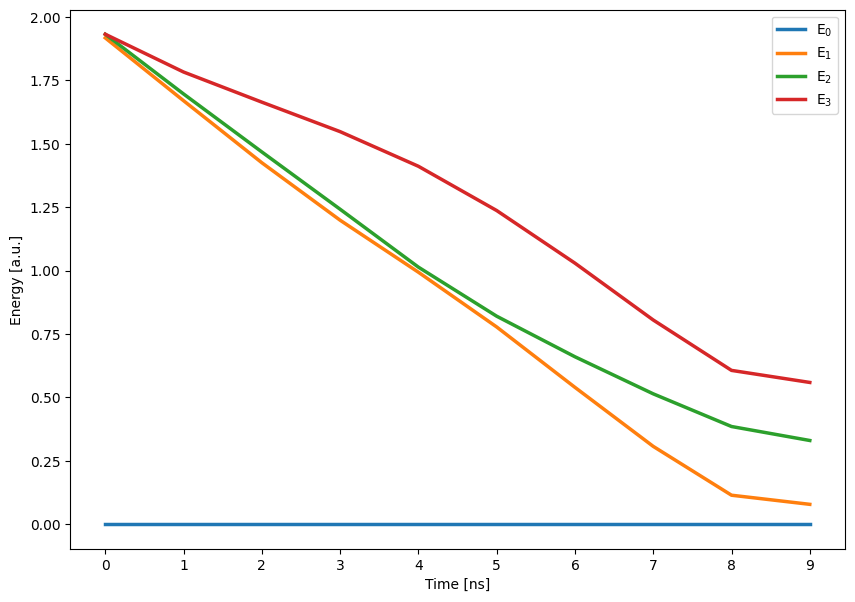

In [75]:
energy_plotter(energies, points = 10)

In [60]:
ising_exp = get_schedule(h0, hf, points=10, schedule=exp_schedule)

fluxes_exp = get_fluxes(ising_exp,"leastsq" )

calculating qubit biases for qubit 1 of 3
point #3 single qubit residuals: 
 [-5.74683561e-02 -8.13174632e-06] 



/Users/denizadiguzel/CAS/cas/elements.py:617: UserWarning: For the point #3, solver found solutions that are not optimal. The relative error is 2667.44 % for single qubit residuals
  warnings.warn(


point #4 single qubit residuals: 
 [-8.73260398e-02  2.71306281e-05] 



/Users/denizadiguzel/CAS/cas/elements.py:617: UserWarning: For the point #4, solver found solutions that are not optimal. The relative error is 31235.68 % for single qubit residuals
  warnings.warn(


point #5 single qubit residuals: 
 [-0.09118264  0.00019543] 



/Users/denizadiguzel/CAS/cas/elements.py:617: UserWarning: For the point #5, solver found solutions that are not optimal. The relative error is 45887.58 % for single qubit residuals
  warnings.warn(


point #6 single qubit residuals: 
 [-0.09168074  0.00140992] 



/Users/denizadiguzel/CAS/cas/elements.py:617: UserWarning: For the point #6, solver found solutions that are not optimal. The relative error is 6503.26 % for single qubit residuals
  warnings.warn(


point #7 single qubit residuals: 
 [-0.09174508  0.01017173] 



/Users/denizadiguzel/CAS/cas/elements.py:617: UserWarning: For the point #7, solver found solutions that are not optimal. The relative error is 907.49 % for single qubit residuals
  warnings.warn(


point #8 single qubit residuals: 
 [-0.09175339  0.0733828 ] 



/Users/denizadiguzel/CAS/cas/elements.py:617: UserWarning: For the point #8, solver found solutions that are not optimal. The relative error is 160.10 % for single qubit residuals
  warnings.warn(


point #9 single qubit residuals: 
 [-9.17698064e-02  5.11974436e-06] 

calculating qubit biases for qubit 2 of 3


/Users/denizadiguzel/CAS/cas/elements.py:617: UserWarning: For the point #9, solver found solutions that are not optimal. The relative error is 17.33 % for single qubit residuals
  warnings.warn(


point #3 single qubit residuals: 
 [-5.74683543e-02  2.25367188e-06] 

point #4 single qubit residuals: 
 [-8.73260369e-02  2.61498376e-05] 



/Users/denizadiguzel/CAS/cas/elements.py:617: UserWarning: For the point #4, solver found solutions that are not optimal. The relative error is 31245.38 % for single qubit residuals
  warnings.warn(


point #5 single qubit residuals: 
 [-0.09118264  0.00018725] 



/Users/denizadiguzel/CAS/cas/elements.py:617: UserWarning: For the point #5, solver found solutions that are not optimal. The relative error is 47822.32 % for single qubit residuals
  warnings.warn(


point #6 single qubit residuals: 
 [-0.09168074  0.00133941] 



/Users/denizadiguzel/CAS/cas/elements.py:617: UserWarning: For the point #6, solver found solutions that are not optimal. The relative error is 6845.55 % for single qubit residuals
  warnings.warn(


point #7 single qubit residuals: 
 [-0.09174508  0.00958073] 



/Users/denizadiguzel/CAS/cas/elements.py:617: UserWarning: For the point #7, solver found solutions that are not optimal. The relative error is 962.81 % for single qubit residuals
  warnings.warn(


point #8 single qubit residuals: 
 [-9.17536423e-02 -2.95259192e-07] 



/Users/denizadiguzel/CAS/cas/elements.py:617: UserWarning: For the point #8, solver found solutions that are not optimal. The relative error is 133.89 % for single qubit residuals
  warnings.warn(


point #9 single qubit residuals: 
 [-9.17676165e-02  4.70976128e-06] 

calculating qubit biases for qubit 3 of 3


/Users/denizadiguzel/CAS/cas/elements.py:617: UserWarning: For the point #9, solver found solutions that are not optimal. The relative error is 18.72 % for single qubit residuals
  warnings.warn(


point #3 single qubit residuals: 
 [-5.74683553e-02  1.99584041e-07] 

point #4 single qubit residuals: 
 [-8.73260392e-02  3.59269475e-05] 



/Users/denizadiguzel/CAS/cas/elements.py:617: UserWarning: For the point #4, solver found solutions that are not optimal. The relative error is 31124.83 % for single qubit residuals
  warnings.warn(


point #5 single qubit residuals: 
 [-0.09118264  0.00027826] 



/Users/denizadiguzel/CAS/cas/elements.py:617: UserWarning: For the point #5, solver found solutions that are not optimal. The relative error is 32499.55 % for single qubit residuals
  warnings.warn(


point #6 single qubit residuals: 
 [-0.09168074  0.00215443] 



/Users/denizadiguzel/CAS/cas/elements.py:617: UserWarning: For the point #6, solver found solutions that are not optimal. The relative error is 4256.61 % for single qubit residuals
  warnings.warn(


point #7 single qubit residuals: 
 [-0.09174508  0.01668101] 



/Users/denizadiguzel/CAS/cas/elements.py:617: UserWarning: For the point #7, solver found solutions that are not optimal. The relative error is 559.01 % for single qubit residuals
  warnings.warn(


point #8 single qubit residuals: 
 [-0.09175339  0.12915496] 



/Users/denizadiguzel/CAS/cas/elements.py:617: UserWarning: For the point #8, solver found solutions that are not optimal. The relative error is 122.67 % for single qubit residuals
  warnings.warn(


point #9 single qubit residuals: 
 [-9.18092431e-02  1.06012483e-05] 


 calculating coupler bias for coupler 1 of 3


/Users/denizadiguzel/CAS/cas/elements.py:617: UserWarning: For the point #9, solver found solutions that are not optimal. The relative error is 9.18 % for single qubit residuals
  warnings.warn(


schedule point 10 / 10
 calculating coupler bias for coupler 2 of 3
schedule point 10 / 10
 calculating coupler bias for coupler 3 of 3


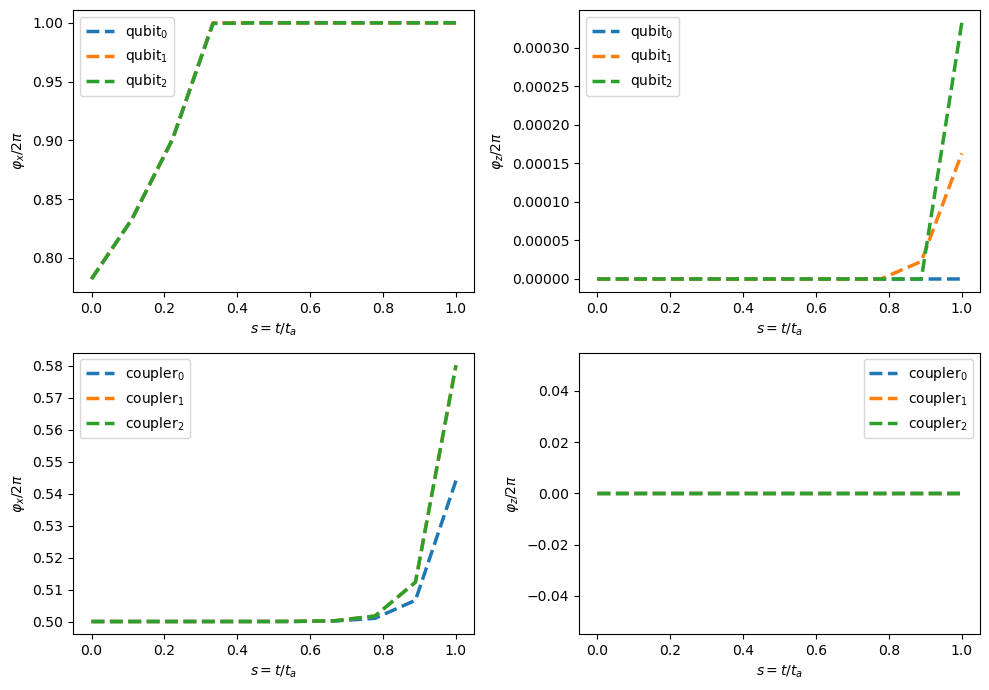

In [53]:
flux_plotter(fluxes_exp, points = 10)

In [70]:
exp_energies = get_schedule_spectrum(fluxes_exp, 4)

Column 1: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Column 2: [1.91784742e+00 2.27074028e-01 7.76834703e-03 5.08742651e-05
 3.66567742e-05 3.72860372e-05 4.22226608e-05 1.45244048e-04
 5.20445968e-02 7.84125851e-02]
Column 3: [1.93232239 0.25271059 0.04773339 0.0496654  0.0495936  0.04913557
 0.04589169 0.02167115 0.05593498 0.33017793]
Column 4: [3.84538772 0.25271059 0.04773347 0.0514657  0.05139006 0.05090098
 0.047406   0.02181099 0.1371154  0.55908398]


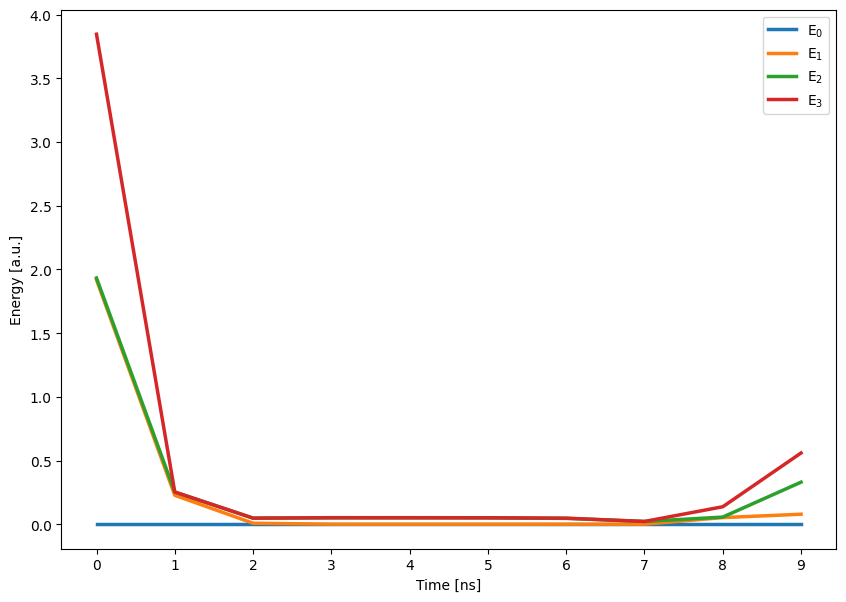

In [76]:
energy_plotter(exp_energies, points = 10)

### Research questions

1. For the annealing schedules calculated, do any of the resulting spectral schedules fulfill the adiabatic theorem?
ANSWER: The linear schedule fulfills it, as the energy steps are smaller than the period associated to a transition frequency between the ground state and the first excited state. Our exponential schedule does not fulfill this, as the time steps in the beginning are too quick. It would be good to explore schedules which start with "moderate" time steps, then changes to "slow/long" time steps. It would be necessary to adapt our implementation of the exponential schedule, to start already with a guess for a period associated to the smallest transition frequency. This would require a preliminary theoretical analysis or experimental data.

2. By this point you will have obtained two energies, one from the software challenge (QAOA) and one from the annealing schedule above. Argue their relation.
While one is an optimzation algorithm, and the other is a simple 

3.  If you have made it here, you have problaly seen the difficulties of solving small instances. Can you propose ways to scale these procedures to more qubits? Some techniques for finding the gap along the annealing process can be found in [1], [2], [3] and [4]. Can you implement a simulation from one of these papers? Research and propose better techniques to find the flux schedule for a given Ising schedule with a greater amount of qubits. 




## Bibliography

[1] Adiabatic Spectroscopy and a Variational Quantum Adiabatic Algorithm: https://arxiv.org/abs/2103.01226

[2] Direct estimation of the energy gap between the ground state and excited state with quantum annealing: https://arxiv.org/abs/2007.10561

[3] Simulating quantum circuits by adiabatic computation: improved spectral gap bounds: https://arxiv.org/abs/1906.05233

[4] Spectroscopy on two coupled flux qubits: https://arxiv.org/abs/cond-mat/0308192

